In [98]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

DATA_DIR = "./202504_data/spectra_20250608"
csv_files = glob.glob(os.path.join(DATA_DIR, "*.txt"))

background_df = pd.read_csv('/home/misha/repos/bee_cam_process_data/plot_spectra/202504_data/rgb_white_background_refl.txt', sep='\t', header=None)
background_data = background_df.iloc[1:].reset_index(drop=True)
avg_background = sum(background_data[i] for i in range(1, 10, 2)) / 5

avg_background

0      -198.7
1         3.5
2         6.9
3         7.7
4         7.1
        ...  
2043     27.9
2044     23.9
2045     24.3
2046     25.3
2047     25.7
Length: 2048, dtype: float64

/tmp/ipykernel_996986/1655410687.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_filtered['minmax'] = (yellow_filtered['norm'] - yellow_filtered['norm'].min()) / (yellow_filtered['norm'].max() - yellow_filtered['norm'].min())
/tmp/ipykernel_996986/1655410687.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  green_filtered['minmax'] = (green_filtered['norm'] - green_filtered['norm'].min()) / (green_filtered['norm'].max() - green_filtered['norm'].min())


(0.0, 1.0)

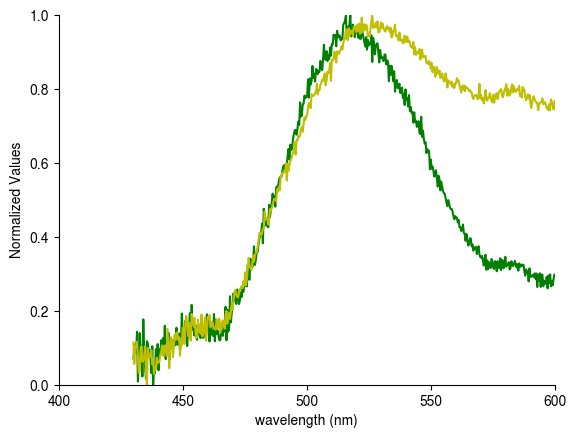

In [99]:
yellow_data = pd.read_csv('202504_data/spectra_20250608/yellow board whitelight june8th.txt', sep='\t', header=None)
yellow_data = yellow_data.drop(columns=[1,2, 4, 6, 8, 10, 12])
yellow_data = yellow_data.drop(index=0).reset_index(drop=True)

yellow_data['avg'] = yellow_data.iloc[:, [1,2,3,4,5]].mean(axis=1)
yellow_data['norm'] = yellow_data['avg']/avg_background

yellow_data[0] = yellow_data[0].astype(float)

yellow_filtered = yellow_data[(yellow_data[0]>430) & (yellow_data[0]<=600)]
yellow_filtered['minmax'] = (yellow_filtered['norm'] - yellow_filtered['norm'].min()) / (yellow_filtered['norm'].max() - yellow_filtered['norm'].min())


green_data = pd.read_csv('202504_data/spectra_20250608/green board whitelight june8th.txt', sep='\t', header=None)
green_data = green_data.drop(columns=[2, 4, 6, 8, 10, 12])
green_data['avg'] = green_data.iloc[:, [1,2,3,4,5,6]].mean(axis=1)
green_data['norm'] = green_data['avg']/avg_background
green_data = green_data.drop(index=0).reset_index(drop=True)
green_data[0] = green_data[0].astype(float)

green_filtered = green_data[(green_data[0]>430) & (green_data[0]<=600)]
green_filtered['minmax'] = (green_filtered['norm'] - green_filtered['norm'].min()) / (green_filtered['norm'].max() - green_filtered['norm'].min())

plt.plot(green_filtered[0], (green_filtered['minmax']), color='g')
plt.plot(yellow_filtered[0], (yellow_filtered['minmax']), color='y')

plt.xticks(
    ticks=range(400,700,50),
    labels=range(400,700,50)
)

plt.xlabel('wavelength (nm)')
plt.ylabel('Normalized Values')
plt.xlim(400,600)
plt.ylim(0,1)

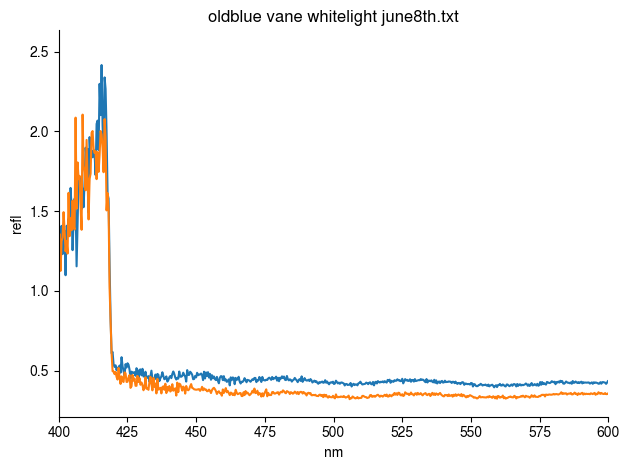

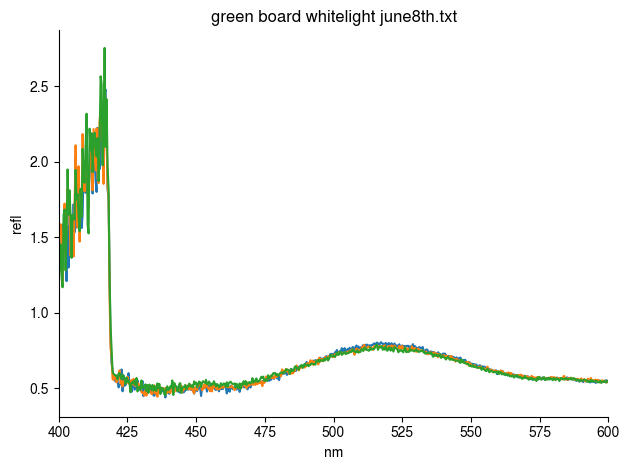

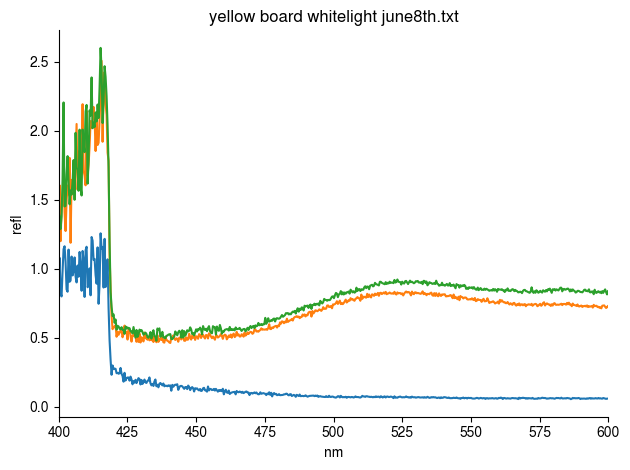

In [2]:

for csv_file in csv_files:
    df = pd.read_csv(csv_file, sep='\t', header=None)
    header = df.iloc[0].dropna().tolist()
    data = df.iloc[1:].reset_index(drop=True)
    # print(len(data))
    clean_header = [h for h in header if pd.notna(h) and str(h).strip() != '']
    if len(clean_header) % 2 != 0:
        clean_header = clean_header[:-1] 
    col_pairs = [(clean_header[i], clean_header[i + 1]) for i in range(0, len(clean_header), 2)]

    plt.figure()
    for i, (x_label, y_label) in enumerate(col_pairs):
        x_vals = pd.to_numeric(data.iloc[:, 2*i])
        y_vals = pd.to_numeric(data.iloc[:, 2*i + 1])
        norm_y = y_vals / avg_background
        plt.plot(x_vals, norm_y, label=f"Norm {y_label}")

    plt.xlim(400, 600)
    # plt.ylim(0,10)
    # plt.axvline(x=430, color='red', linestyle='--', linewidth=1.5)

    plt.title(f"{os.path.basename(csv_file)}")
    plt.xlabel("nm")
    plt.ylabel("refl")
    plt.tight_layout()
    plt.show()


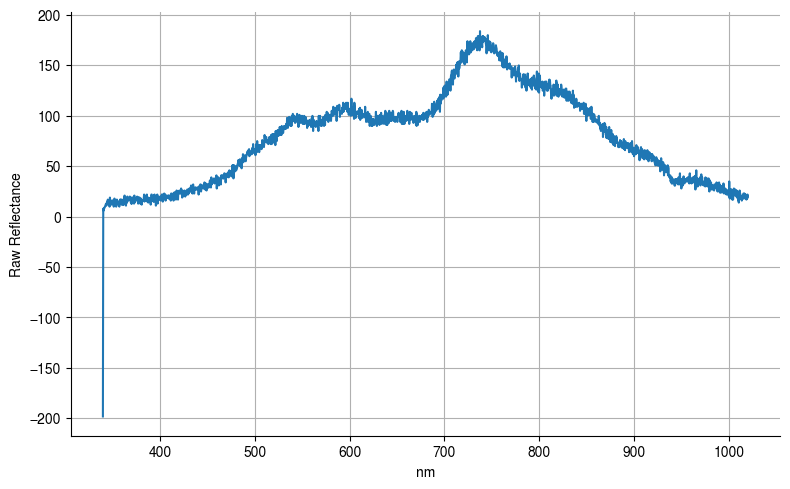

In [3]:
plt.figure(figsize=(8, 5))
x_vals = pd.to_numeric(data.iloc[:, 0])
y_vals = pd.to_numeric(data.iloc[:, 1])

plt.plot(x_vals, y_vals)

plt.xlabel("nm")
plt.ylabel("Raw Reflectance")
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,340.064,-198.22,340.064,-198.61,340.064,-198.83,340.064,-199.39,340.064,-199.17,340.064,-199.5,NaN
1,340.433,7.78,340.433,1.39,340.433,4.17,340.433,5.61,340.433,3.83,340.433,6.5,NaN
2,340.803,5.78,340.803,8.39,340.803,9.17,340.803,3.61,340.803,5.83,340.803,9.5,NaN
3,341.172,7.78,341.172,5.39,341.172,5.17,341.172,7.61,341.172,7.83,341.172,8.5,NaN
4,341.542,8.78,341.542,7.39,341.542,6.17,341.542,7.61,341.542,7.83,341.542,6.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,1018.456,20.78,1018.456,30.39,1018.456,31.17,1018.456,27.61,1018.456,30.83,1018.456,29.5,NaN
2044,1018.741,19.78,1018.741,27.39,1018.741,27.17,1018.741,29.61,1018.741,28.83,1018.741,28.5,NaN
2045,1019.026,17.78,1019.026,32.39,1019.026,30.17,1019.026,32.61,1019.026,24.83,1019.026,26.5,NaN
2046,1019.312,21.78,1019.312,29.39,1019.312,34.17,1019.312,34.61,1019.312,26.83,1019.312,26.5,NaN


2048


(0.0, 10.0)

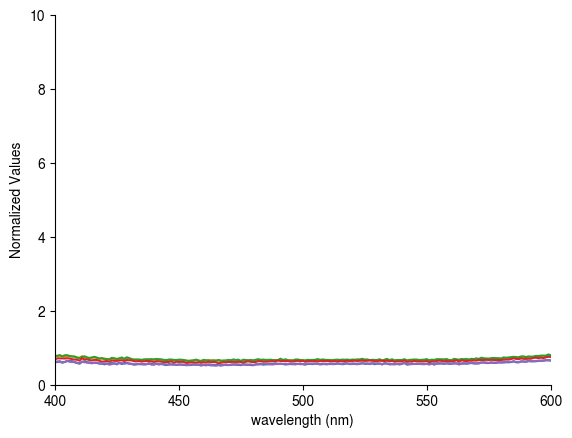

In [5]:
df = pd.read_csv("202504_data/UTF-8whitelight Murdock CMYc blue.txt", sep='\t', header=None)

df = df.drop(columns=[2, 4, 6, 8, 10])
data = df.iloc[1:].reset_index(drop=True)

background_data = background_df.iloc[1:].reset_index(drop=True)
avg_background = (background_data[3]+background_data[1])/2
print(len(avg_background))

for col in range(1, 11, 2):
    plt.plot(data[0], (data[col])/avg_background)

plt.xticks(
    ticks=range(400,700,50),
    labels=range(400,700,50)
)

plt.xlabel('wavelength (nm)')
plt.ylabel('Normalized Values')
plt.xlim(400,600)
plt.ylim(0,10)

In [6]:
background_data = data = background_df.iloc[1:].reset_index(drop=True)
avg_background = (background_data[3]+background_data[1])/2
avg_background


0      -198.695
1         2.805
2         6.305
3         8.805
4         6.805
         ...   
2043     27.805
2044     24.805
2045     24.305
2046     25.805
2047     25.805
Length: 2048, dtype: float64